# Blackfriday Sales Analysis

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
df=pd.read_csv("C:\\Users\\91772\\OneDrive\\Desktop\\BlackFriday.csv")

In [3]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172


# Dataset Overview

- Total Records: 537,577 (Over half a million customer transactions)
- Total Columns: 12
- Dataset Size: 49.2 MB
- Purpose: Analyzing customer demographics, purchase behavior, and product categories during Black Friday sales.

# Data Exploration


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [5]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [7]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


Since the columns Product_Category_2 and Product_Category_3 contain a significant amount of missing values (31% and 69%, respectively), it is reasonable to remove them to maintain data quality and simplify analysis. By dropping these columns, we ensure that our analysis is based on more complete and reliable information.

In [8]:
df.drop('Product_Category_2',axis=1,inplace=True)
df.drop('Product_Category_3',axis=1,inplace=True)

After removing these columns, the dataset will primarily focus on customer demographics, product categories, and purchase behavior, allowing for a more accurate and meaningful analysis of Black Friday sales trends.

In [9]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Purchase                      0
dtype: int64

In [10]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


# columns wise info

- User_ID (Integer) → Unique identifier for each customer.
- Gender (Categorical: 'M', 'F') → Customer's gender (Male or Female).
- Age (Categorical: '0-17', '18-25', '26-35', etc.) → Age group of the customer.
- Occupation (Integer: 0-20) → Encoded representation of the customer's occupation.

- City_Category (Categorical: 'A', 'B', 'C') → City classification:
  - A = kolkata
  - B = delhi
  - C = mumbai
  
- Stay_In_Current_City_Years (Categorical: '0', '1', '2', '3', '4+') → Number of years the customer has lived in the current city.
- Marital_Status (Integer: 0, 1) → Indicates if the customer is married (1) or single (0).

In [11]:
df['User_ID'].nunique()

5891

In [12]:
df['User_ID'].unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529],
      dtype=int64)

In [13]:
print(df['User_ID'].nunique())
print(df['User_ID'].unique())

5891
[1000001 1000002 1000003 ... 1004113 1005391 1001529]


In [14]:
print(df['User_ID'].nunique())
print(df['User_ID'].unique())

5891
[1000001 1000002 1000003 ... 1004113 1005391 1001529]


In [15]:
print(df['Product_ID'].nunique())
print(df['Product_ID'].unique())

3623
['P00069042' 'P00248942' 'P00087842' ... 'P00038842' 'P00295642'
 'P00091742']


In [16]:
print(df['Gender'].nunique())
print(df['Gender'].unique())

2
['F' 'M']


In [17]:
print(df['Age'].nunique())
print(df['Age'].unique())

7
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']


In [18]:
print(df['Occupation'].nunique())
print(df['Occupation'].unique())

21
[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]


In [19]:
print(df['City_Category'].nunique())
print(df['City_Category'].unique())

3
['A' 'C' 'B']


In [20]:
print(df['Stay_In_Current_City_Years'].nunique())
print(df['Stay_In_Current_City_Years'].unique())

5
['2' '4+' '3' '1' '0']


In [21]:
print(df['Marital_Status'].nunique())
print(df['Marital_Status'].unique())

2
[0 1]


In [22]:
print(df['Product_Category_1'].nunique())
print(df['Product_Category_1'].unique())

18
[ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9]


In [23]:
print(df['Purchase'].nunique())
print(df['Purchase'].unique())

17959
[ 8370 15200  1422 ... 14539 11120 18426]


# Observation

- Total Unique 
- User_ID → 5,891 customers.
- Gender  → 2 unique values (M = Male, F = Female).
- Age Groups → 7 unique categories (0-17, 18-25, 26-35, 36-45, 46-50, 51-55, 55+).
- Occupation → 21 unique job categories (encoded from 0 to 20).
- City Categories → 3 unique city types (A = Metro, B = Urban, C = Semi-Urban).
- Years Stayed in Current City → 5 unique values (0, 1, 2, 3, 4+).
- Marital Status → 2 unique values (0 = Single, 1 = Married)

In [24]:
df['Marital_Status']=df['Marital_Status'].astype('str')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     537577 non-null  int64 
 1   Product_ID                  537577 non-null  object
 2   Gender                      537577 non-null  object
 3   Age                         537577 non-null  object
 4   Occupation                  537577 non-null  int64 
 5   City_Category               537577 non-null  object
 6   Stay_In_Current_City_Years  537577 non-null  object
 7   Marital_Status              537577 non-null  object
 8   Product_Category_1          537577 non-null  int64 
 9   Purchase                    537577 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 41.0+ MB


In [26]:
df['Marital_Status']=df['Marital_Status'].str.replace('1','married').str.replace('0','single')

In [27]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,single,3,8370
1,1000001,P00248942,F,0-17,10,A,2,single,1,15200
2,1000001,P00087842,F,0-17,10,A,2,single,12,1422
3,1000001,P00085442,F,0-17,10,A,2,single,12,1057
4,1000002,P00285442,M,55+,16,C,4+,single,8,7969


In [28]:
df['City_Category']=df['City_Category'].str.replace('A','kolkata').str.replace('B','delhi').str.replace('C','mumbai')

In [29]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,kolkata,2,single,3,8370
1,1000001,P00248942,F,0-17,10,kolkata,2,single,1,15200
2,1000001,P00087842,F,0-17,10,kolkata,2,single,12,1422
3,1000001,P00085442,F,0-17,10,kolkata,2,single,12,1057
4,1000002,P00285442,M,55+,16,mumbai,4+,single,8,7969


In [30]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Purchase'],
      dtype='object')

In [31]:
df.describe()

,User_ID,Occupation,Product_Category_1,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000
mean,1.002992e+06,8.08271,5.295546,9333.859853
std,1.714393e+03,6.52412,3.750701,4981.022133
min,1.000001e+06,0.00000,1.000000,185.000000
25%,1.001495e+06,2.00000,1.000000,5866.000000
50%,1.003031e+06,7.00000,5.000000,8062.000000
75%,1.004417e+06,14.00000,8.000000,12073.000000
max,1.006040e+06,20.00000,18.000000,23961.000000


In [32]:
for i in df.columns:
   print(i,':',df[i].nunique(),df[i].unique())
   print('-'* 69)

User_ID : 5891 [1000001 1000002 1000003 ... 1004113 1005391 1001529]
---------------------------------------------------------------------
Product_ID : 3623 ['P00069042' 'P00248942' 'P00087842' ... 'P00038842' 'P00295642'
 'P00091742']
---------------------------------------------------------------------
Gender : 2 ['F' 'M']
---------------------------------------------------------------------
Age : 7 ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
---------------------------------------------------------------------
Occupation : 21 [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
---------------------------------------------------------------------
City_Category : 3 ['kolkata' 'mumbai' 'delhi']
---------------------------------------------------------------------
Stay_In_Current_City_Years : 5 ['2' '4+' '3' '1' '0']
---------------------------------------------------------------------
Marital_Status : 2 ['single' 'married']
--------------------------------------

In [33]:
for i in df.columns:
    print(i,':',df[i].describe())
    print('-'*89)

User_ID : count    5.375770e+05
mean     1.002992e+06
std      1.714393e+03
min      1.000001e+06
25%      1.001495e+06
50%      1.003031e+06
75%      1.004417e+06
max      1.006040e+06
Name: User_ID, dtype: float64
-----------------------------------------------------------------------------------------
Product_ID : count        537577
unique         3623
top       P00265242
freq           1858
Name: Product_ID, dtype: object
-----------------------------------------------------------------------------------------
Gender : count     537577
unique         2
top            M
freq      405380
Name: Gender, dtype: object
-----------------------------------------------------------------------------------------
Age : count     537577
unique         7
top        26-35
freq      214690
Name: Age, dtype: object
-----------------------------------------------------------------------------------------
Occupation : count    537577.00000
mean          8.08271
std           6.52412
min           0.

# Gender analysis

In [34]:
df['Gender'].describe()

count     537577
unique         2
top            M
freq      405380
Name: Gender, dtype: object

In [35]:
df['Gender']=='M'

0         False
1         False
2         False
3         False
4          True
          ...  
537572     True
537573     True
537574     True
537575     True
537576     True
Name: Gender, Length: 537577, dtype: bool

In [36]:
len(df[df['Gender']=='F'])

132197

In [37]:
df['Gender'].value_counts()

Gender
M    405380
F    132197
Name: count, dtype: int64

In [38]:
#another option
df.groupby('Gender').size()

Gender
F    132197
M    405380
dtype: int64

<Axes: title={'center': 'Gender Ratio'}>

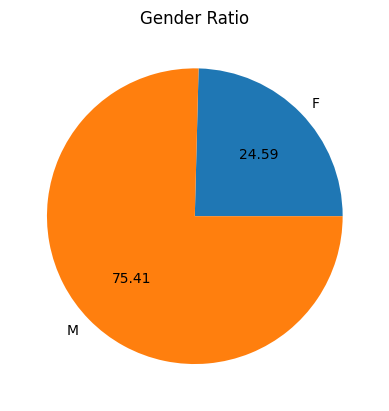

In [39]:
df.groupby('Gender').size().plot(kind='pie',title='Gender Ratio',autopct='%.2f')

In [40]:
df.groupby('Gender').count()

,User_ID,Product_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
Gender,,,,,,,,,
F,132197,132197,132197,132197,132197,132197,132197,132197,132197
M,405380,405380,405380,405380,405380,405380,405380,405380,405380


# Overall Gender Distribution
- More male shoppers than female shoppers → 405,380 transactions by males vs. 132,197 by females, indicating that men contribute to a larger share of purchases.

In [41]:
df.groupby('Gender')['Purchase'].sum()

Gender
F    1164624021
M    3853044357
Name: Purchase, dtype: int64

In [42]:
df.groupby('Gender')['Purchase'].mean()

Gender
F    8809.761349
M    9504.771713
Name: Purchase, dtype: float64

In [43]:
df.groupby("Age")['Purchase'].size()

Age
0-17      14707
18-25     97634
26-35    214690
36-45    107499
46-50     44526
51-55     37618
55+       20903
Name: Purchase, dtype: int64

# Observations from Age-Based Purchase Analysis
- 1 Most Active Shopper Age Groups
- 26-35 age group dominates Black Friday purchases → 214,690 transactions, indicating they are the most active buyers.
- 18-25 and 36-45 age groups also contribute significantly → 97,634 and 107,499 purchases, respectively.


- 2️ Least Active Shopper Age Groups
- Older shoppers (46-50, 51-55, and 55+) shop less frequently → Combined, they account for only ~103,000 transactions.
- Teenagers (0-17) are the least active → Only 14,707 purchases, possibly due to limited financial independence.

<Axes: xlabel='Age'>

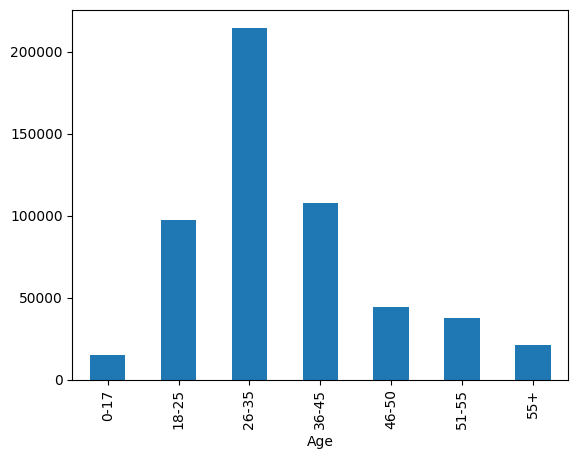

In [44]:
df.groupby("Age")['Purchase'].size().plot(kind="bar")

In [45]:
df['Product_ID'].nunique()

3623

In [46]:
df.groupby("Age")['Product_ID'].nunique()

Age
0-17     2300
18-25    3213
26-35    3419
36-45    3318
46-50    3099
51-55    2877
55+      2573
Name: Product_ID, dtype: int64

<Axes: xlabel='Age'>

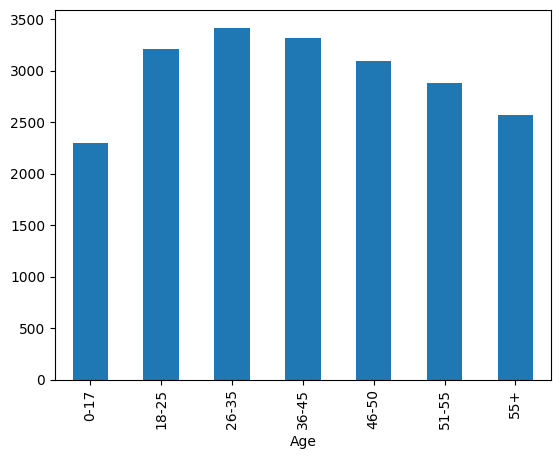

In [47]:
df.groupby("Age")['Product_ID'].nunique().plot(kind='bar')

# Observations: Unique Products Purchased by Age Group

- 1️ Most Diverse Shopping Group :
  The 26-35 age group purchases the highest variety of unique products, indicating they explore different product categories more than other age groups.

- 2 High Engagement in Young & Middle-Age Groups:
  18-25 and 36-45 age groups also buy a wide range of unique products, showing high engagement in shopping.

- 3 Least Product Variety Among Older & Youngest Groups:
  55+ and 0-17 age groups purchase fewer unique products, suggesting limited shopping preferences or fewer available options for them

In [48]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [49]:
len(df[df['Age']=='26-35'])

214690

In [50]:
# Age unique
for i in df['Age'].unique():
    print(i,':',len(df[df['Age']==i]))

0-17 : 14707
55+ : 20903
26-35 : 214690
46-50 : 44526
51-55 : 37618
36-45 : 107499
18-25 : 97634


In [51]:
df[df['Age']=='18-25']['Product_ID'].nunique()

3213

[['0-17', 2300], ['55+', 2573], ['26-35', 3419], ['46-50', 3099], ['51-55', 2877], ['36-45', 3318], ['18-25', 3213]]


<Axes: xlabel='Age'>

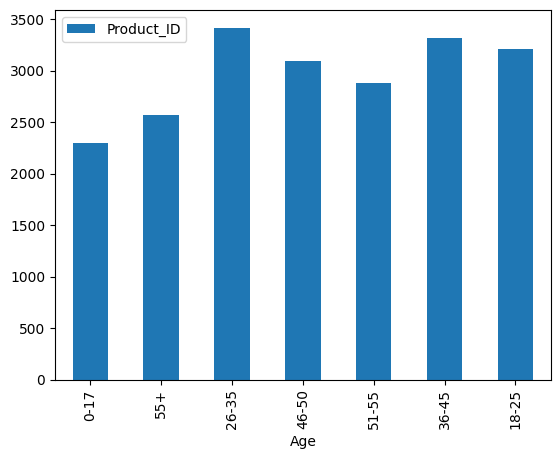

In [52]:
#for Product_ID unique
lst=[]
for i in df['Age'].unique():
    lst.append([i,df[df['Age']==i]['Product_ID'].nunique()])
print(lst)
data=pd.DataFrame(lst,columns=['Age','Product_ID'])
data.plot(kind='bar',x='Age',y='Product_ID')

In [53]:
df[df['Age']=='18-25']['Purchase'].nunique()

13716

In [54]:
#purchasing amount 
df.groupby('Age')['Purchase'].sum()


Age
0-17      132659006
18-25     901669280
26-35    1999749106
36-45    1010649565
46-50     413418223
51-55     361908356
55+       197614842
Name: Purchase, dtype: int64

<Axes: xlabel='Age'>

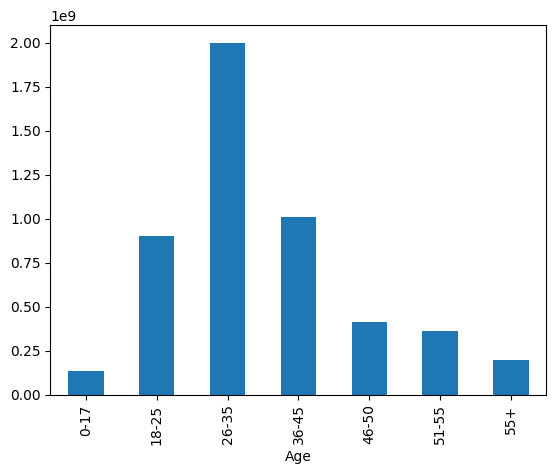

In [55]:
df.groupby('Age')['Purchase'].sum().plot(kind='bar')

# Observations: Total Purchase Amount by Age Group

- 1️. The 26-35 Age Group Spends the Most
   This age group has the highest total purchase amount, reinforcing that they are the most active shoppers with the biggest spending power.
   
   

- 2️. Strong Spending from 36-45 and 18-25 Groups
  These groups also contribute significantly, showing they are key target markets.
  
  

- 3️. Older and Younger Groups Spend Less
  0-17 and 55+ age groups have the lowest total purchases, likely due to financial constraints or lower shopping needs.

<Axes: ylabel='Purchase'>

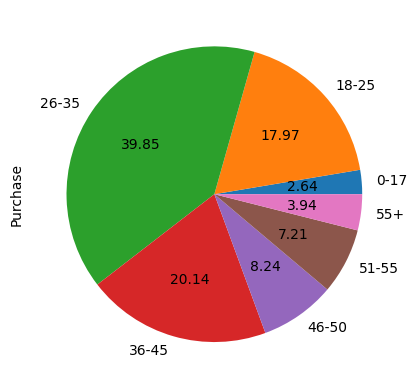

In [56]:
df.groupby('Age')['Purchase'].sum().plot(kind='pie',autopct='%.2f')

# Observations: Percentage of Total Purchases by Age Group

- 1️. 26-35 Age Group Dominates Spending
  This group contributes the highest percentage of total purchases, confirming their strong role in overall sales.

- 2️. 18-25 and 36-45 Age Groups Are Key Markets
  Together, these age groups make up a significant portion of total spending, indicating strong engagement.

- 3️. 0-17 and 55+ Groups Have Minimal Contributions
  These groups spend the least, likely due to lower disposable income or less interest in shopping.

In [57]:
df.groupby('Age')['Purchase'].mean()

Age
0-17     9020.126878
18-25    9235.197575
26-35    9314.588970
36-45    9401.478758
46-50    9284.872277
51-55    9620.616620
55+      9453.898579
Name: Purchase, dtype: float64

<Axes: xlabel='Age'>

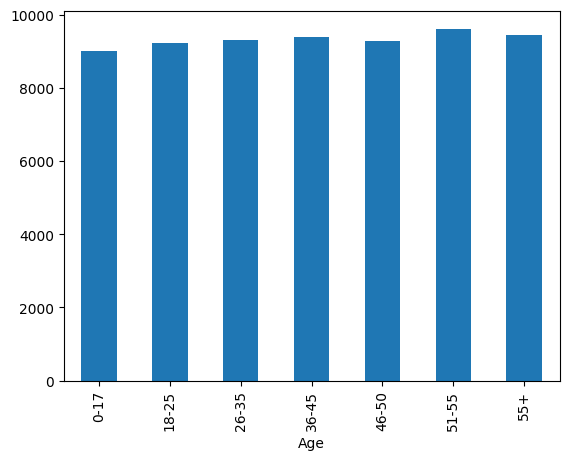

In [58]:
df.groupby('Age')['Purchase'].mean().plot(kind='bar')

<Axes: xlabel='Age', ylabel='count'>

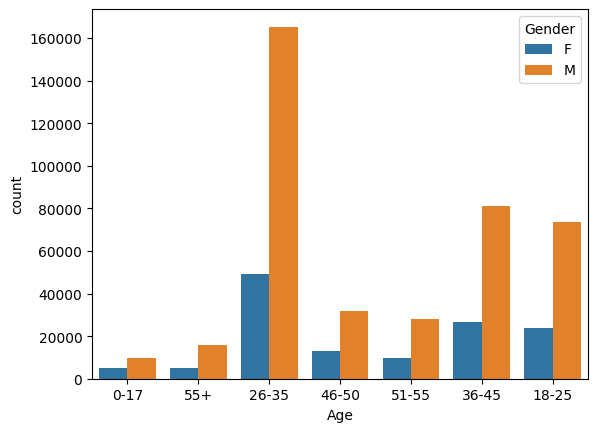

In [59]:
sns.countplot(x='Age',data=df,hue='Gender')

# Observation


- More Male Transactions Across All Age Groups : 
  In every age category, males have more transactions than females, indicating higher shopping activity.

<Axes: xlabel='Gender', ylabel='count'>

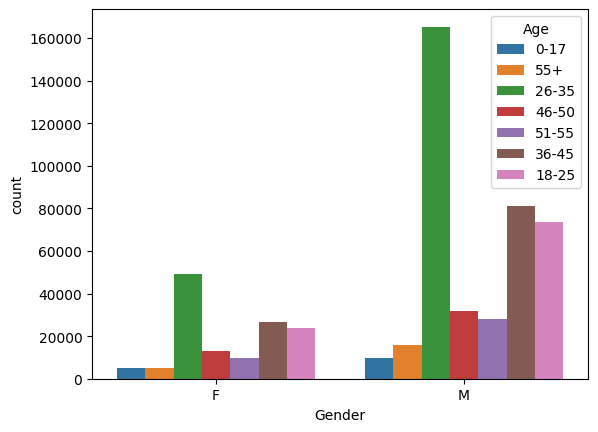

In [60]:
#another option
sns.countplot(x='Gender',data=df,hue='Age')

<Axes: xlabel='Gender', ylabel='count'>

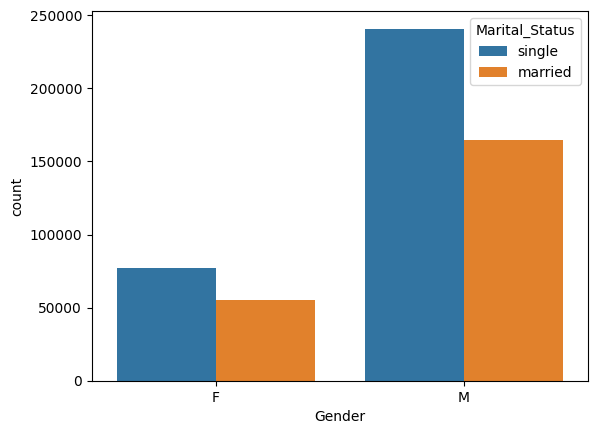

In [61]:
sns.countplot(x='Gender',data=df,hue='Marital_Status')

<Axes: >

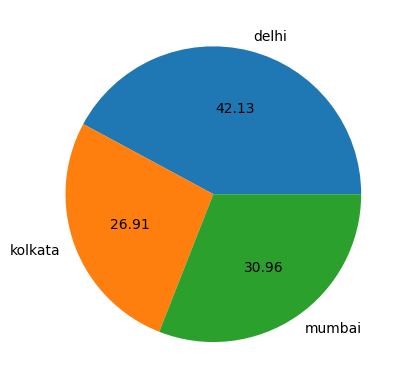

In [62]:
df.groupby("City_Category").size().plot(kind='pie',autopct='%.2f')

<Axes: xlabel='City_Category', ylabel='count'>

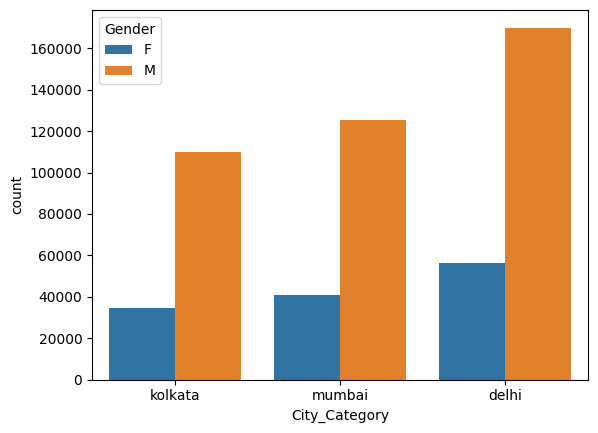

In [63]:
# city wise
sns.countplot(x='City_Category',data=df,hue='Gender')

# Observations 

- More Male Transactions Across All City Categories

In [64]:
df.groupby('City_Category')['Purchase'].sum()

City_Category
delhi      2083431612
kolkata    1295668797
mumbai     1638567969
Name: Purchase, dtype: int64

In [65]:
df.groupby('City_Category')['Purchase'].mean()

City_Category
delhi      9198.657848
kolkata    8958.011014
mumbai     9844.441855
Name: Purchase, dtype: float64

<Axes: ylabel='Purchase'>

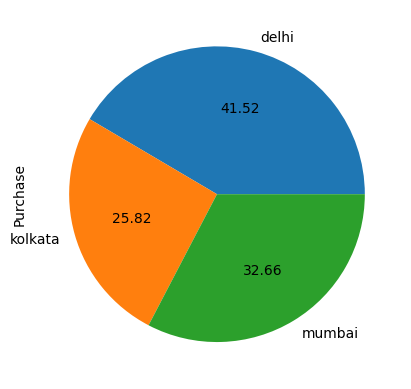

In [66]:
df.groupby('City_Category')['Purchase'].sum().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='Purchase'>

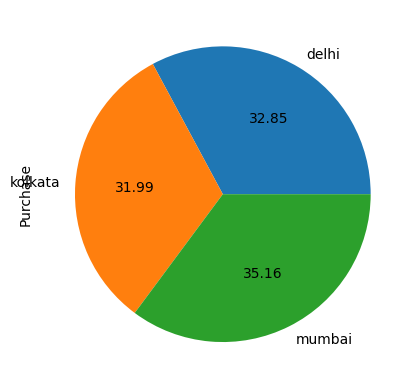

In [67]:
df.groupby('City_Category')['Purchase'].mean().plot(kind='pie',autopct='%.2f')

<Axes: xlabel='Product_Category_1', ylabel='count'>

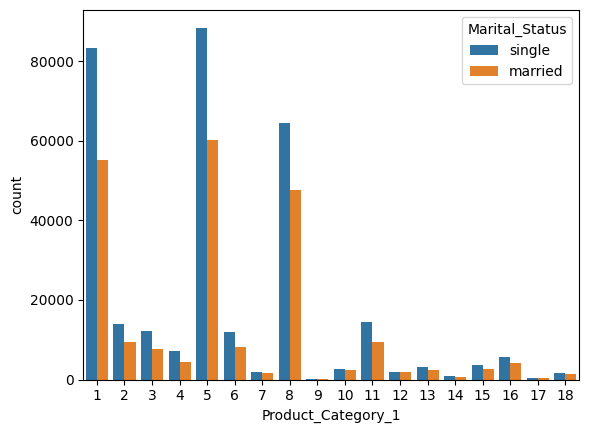

In [68]:
sns.countplot(x='Product_Category_1',data=df,hue='Marital_Status')

<Axes: xlabel='Age', ylabel='count'>

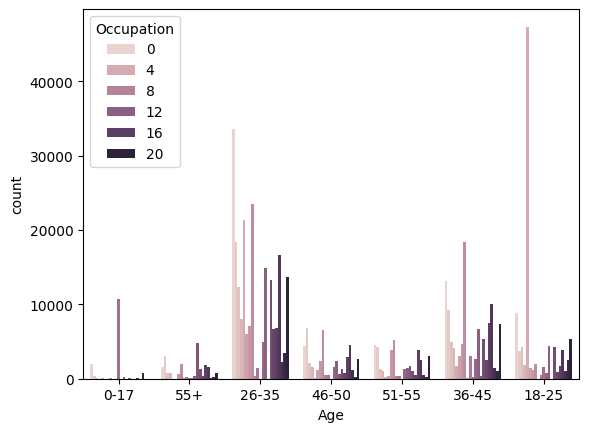

In [69]:
sns.countplot(x='Age',data=df,hue='Occupation')

# Conclusion

The analysis of Black Friday sales data reveals significant shopping trends across different demographics. Gender-based trends indicate that males consistently make more transactions than females across all categories. This trend is particularly evident among married males, who engage in more shopping compared to their single counterparts. This suggests that family-driven purchases contribute significantly to the overall sales.